In [1]:
import pandas as pd

# Load the datasets
df1 = pd.read_excel('Copy of Dunzo PM Internship Aptitude Test_ Dataset.xlsx', sheet_name='Dataset 1 Transaction Details')
df2 = pd.read_excel('Copy of Dunzo PM Internship Aptitude Test_ Dataset.xlsx', sheet_name='Dataset 2 User Details')

# Display the first few rows to inspect the data
print(df1.head())
print(df2.head())

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [2]:
pip3 install openpyxl

SyntaxError: invalid syntax (1543805522.py, line 1)

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the datasets
df1 = pd.read_excel('Copy of Dunzo PM Internship Aptitude Test_ Dataset.xlsx', sheet_name='Dataset 1 Transaction Details')
df2 = pd.read_excel('Copy of Dunzo PM Internship Aptitude Test_ Dataset.xlsx', sheet_name='Dataset 2 User Details')

# Display the first few rows to inspect the data
print(df1.head())
print(df2.head())


   transaction_id  order_value              created_at   user_id  \
0        83771286          259 2021-09-18 18:18:08.277  10629750   
1        83771270           56 2021-09-18 18:17:58.920     58794   
2        83771233          389 2021-09-18 18:17:42.201   5508970   
3        83771214          131 2021-09-18 18:17:32.410   3310990   
4        83771198          916 2021-09-18 18:17:24.133   5061792   

  payment_method                                         extra_data  
0          SIMPL  {"subtag": "Meat", "source": {"source_id": "A-...  
1          SIMPL  {"subtag": "Grocery", "source": {"source_id": ...  
2           CARD  {"subtag": "Grocery", "source": {"source_id": ...  
3           CARD  {"subtag": "Grocery", "source": {"source_id": ...  
4          PAYTM  {"subtag": "grocery", "source": {"source_id": ...  
    user_id  user_city user_phone_type
0  12071970  Bangalore         Android
1  12048320       Pune          Iphone
2  12048320       Pune          Iphone
3  12039101  Ba

In [2]:
# Merge the two datasets on 'user_id'
merged_df = pd.merge(df1, df2, on='user_id', how='left')

# Display the merged data
print(merged_df.head())


   transaction_id  order_value              created_at   user_id  \
0        83771286          259 2021-09-18 18:18:08.277  10629750   
1        83771270           56 2021-09-18 18:17:58.920     58794   
2        83771270           56 2021-09-18 18:17:58.920     58794   
3        83771270           56 2021-09-18 18:17:58.920     58794   
4        83771270           56 2021-09-18 18:17:58.920     58794   

  payment_method                                         extra_data  \
0          SIMPL  {"subtag": "Meat", "source": {"source_id": "A-...   
1          SIMPL  {"subtag": "Grocery", "source": {"source_id": ...   
2          SIMPL  {"subtag": "Grocery", "source": {"source_id": ...   
3          SIMPL  {"subtag": "Grocery", "source": {"source_id": ...   
4          SIMPL  {"subtag": "Grocery", "source": {"source_id": ...   

   user_city user_phone_type  
0  Bangalore         Android  
1  Bangalore         Android  
2  Bangalore         Android  
3  Bangalore         Android  
4  Bangal

In [3]:
# Check for missing values
print(merged_df.isnull().sum())

transaction_id     0
order_value        0
created_at         0
user_id            0
payment_method     0
extra_data         0
user_city          0
user_phone_type    0
dtype: int64


In [4]:
# Payment method distribution
payment_method_dist = merged_df['payment_method'].value_counts()
print(payment_method_dist)

payment_method
PAYTM    740
SIMPL    734
GPAY     232
CARD     104
Name: count, dtype: int64


In [6]:
# Convert 'created_at' to datetime and extract features
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
merged_df['transaction_hour'] = merged_df['created_at'].dt.hour

In [7]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
X = merged_df[['order_value', 'transaction_hour']].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
merged_df['segment'] = kmeans.fit_predict(X)

Matplotlib is building the font cache; this may take a moment.


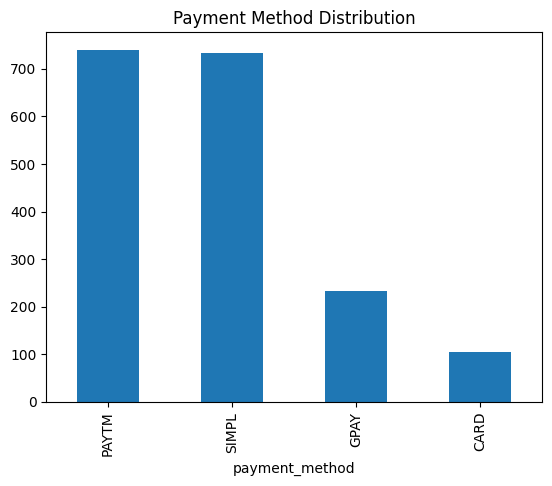

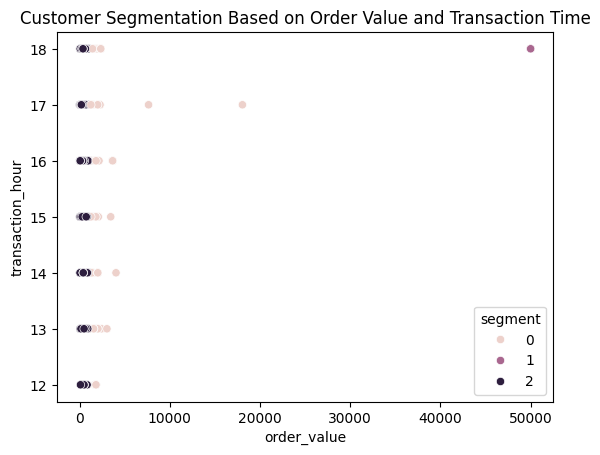

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Payment method distribution visualization
payment_method_dist.plot(kind='bar')
plt.title('Payment Method Distribution')
plt.show()

# Visualize customer segments
sns.scatterplot(x='order_value', y='transaction_hour', hue='segment', data=merged_df)
plt.title('Customer Segmentation Based on Order Value and Transaction Time')
plt.show()